In [1]:
import os
import simba as si
si.__version__

/srv/local/jayoung/conda/envs/jy_simba_copy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.2'

In [2]:
workdir = 'result_simba_edge_weights'
si.settings.set_workdir(workdir)

Saving results in: result_simba_edge_weights


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
# make plots prettier
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [5]:
adata_CG = si.datasets.rna_10xpmbc3k()

In [6]:
adata_CG

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'celltype'
    var: 'gene_ids'

In [7]:
si.pp.filter_genes(adata_CG,min_n_cells=3)

Before filtering: 
2700 cells, 32738 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2700 cells, 13714 genes


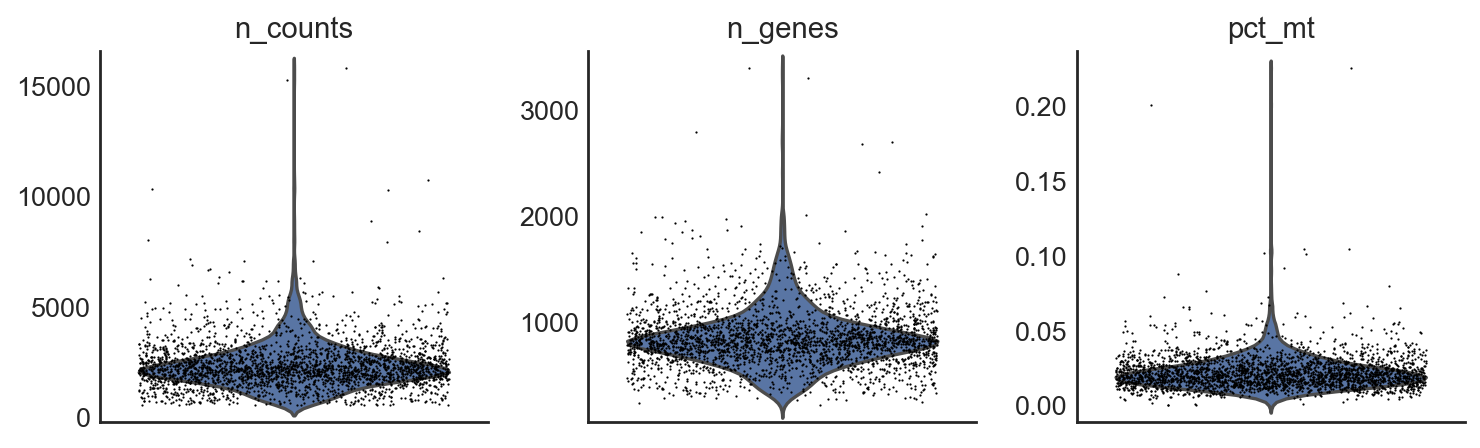

In [8]:
si.pp.cal_qc_rna(adata_CG)
si.pl.violin(adata_CG,list_obs=['n_counts','n_genes','pct_mt'])

In [10]:
si.pp.normalize(adata_CG,method='lib_size')
si.pp.log_transform(adata_CG)

si.pp.select_variable_genes(adata_CG, n_top_genes=2000)
si.pl.variable_genes(adata_CG,show_texts=True)

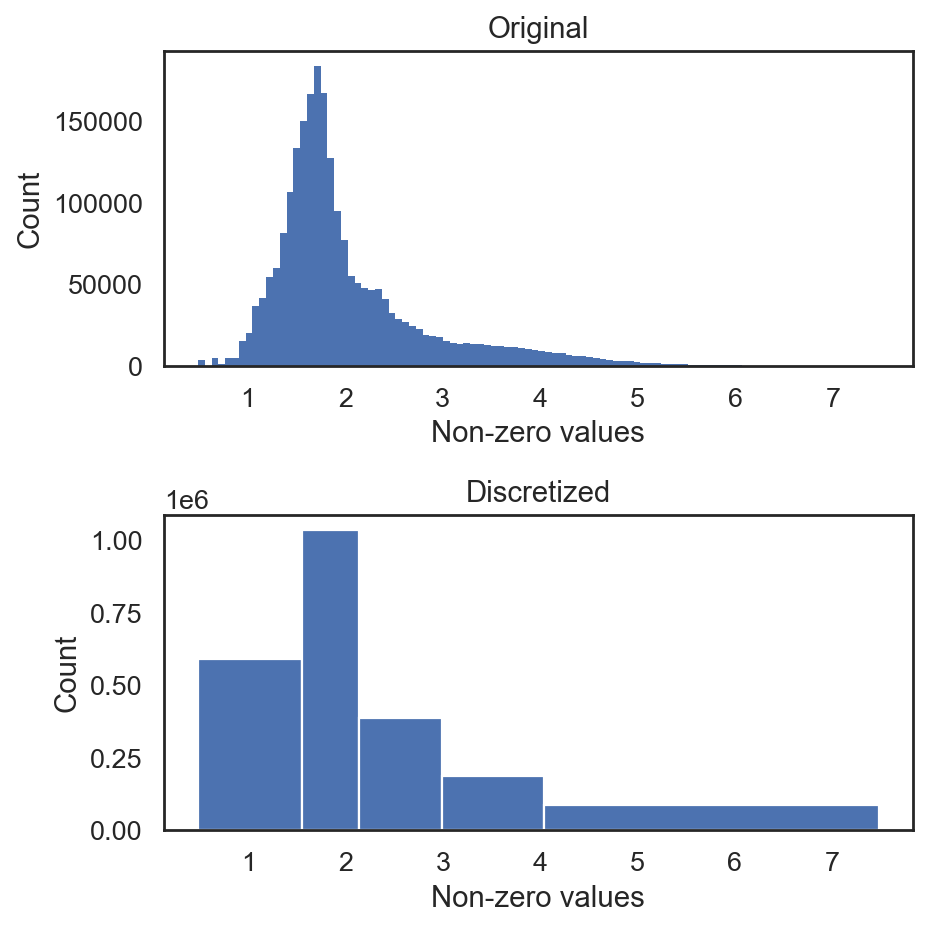

In [11]:
si.tl.discretize(adata_CG,n_bins=5)
si.pl.discretize(adata_CG,kde=False)

### Using discretized gene expression - all genes

In [12]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                layer='simba',
                add_edge_weights=False,
                dirname='graph0')

relation0: source: C, destination: G
#edges: 590134
relation1: source: C, destination: G
#edges: 1034817
relation2: source: C, destination: G
#edges: 384939
relation3: source: C, destination: G
#edges: 185485
relation4: source: C, destination: G
#edges: 87601
Total number of edges: 2282976
Writing graph file "pbg_graph.txt" to "result_simba_edge_weights/pbg/graph0" ...
Finished.


In [ ]:
si.settings.pbg_params

In [ ]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
# dict_config['wd'] = 0.015521
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 4 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

In [ ]:
si.pl.pbg_metrics(fig_ncol=1)

In [ ]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e',
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

dict_adata = si.read_embedding()

adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

In [ ]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(adata_C,color=['celltype'],
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

### Using discretized gene expression - only variable genes

In [ ]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=True,
                layer='simba',
                add_edge_weights=False,
                dirname='graph1')

In [ ]:
si.settings.pbg_params

In [ ]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 4 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

In [ ]:
si.pl.pbg_metrics(fig_ncol=1)

In [ ]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e',
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

dict_adata = si.read_embedding()

adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

In [ ]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(adata_C,color=['celltype'],
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

### Using edge weights (raw gene expression) - all genes

In [13]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                layer=None,
                add_edge_weights=True,
                dirname='graph2')

relation0: source: C, destination: G
#edges: 2282976
Total number of edges: 2282976
Writing graph file "pbg_graph.txt" to "result_simba_edge_weights/pbg/graph2" ...
Finished.


In [14]:
si.settings.pbg_params

{'entity_path': 'result_simba_edge_weights/pbg/graph2/input/entity',
 'edge_paths': ['result_simba_edge_weights/pbg/graph2/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1}, 'G': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'G',
   'operator': 'none',
   'weight': 1.0}],
 'dynamic_relations': False,
 'dimension': 50,
 'global_emb': False,
 'comparator': 'dot',
 'num_epochs': 10,
 'workers': 4,
 'num_batch_negs': 50,
 'num_uniform_negs': 50,
 'loss_fn': 'softmax',
 'lr': 0.1,
 'early_stopping': False,
 'regularization_coef': 0.0,
 'wd': 0.0,
 'wd_interval': 50,
 'eval_fraction': 0.05,
 'eval_num_batch_negs': 50,
 'eval_num_uniform_negs': 50,
 'checkpoint_preservation_interval': None}

In [15]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 4 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model', use_edge_weights=True)

Auto-estimated weight decay is 1.552147E-02
`.settings.pbg_params['wd']` has been updated to 1.552147E-02
Converting input data ...
Edge weights are being used ...
[2022-11-15 23:31:25.985056] Found some files that indicate that the input data has already been preprocessed, not doing it again.
[2022-11-15 23:31:25.985536] These files are in: result_simba_edge_weights/pbg/graph2/input/entity, result_simba_edge_weights/pbg/graph2/input/edge
Starting training ...
Finished


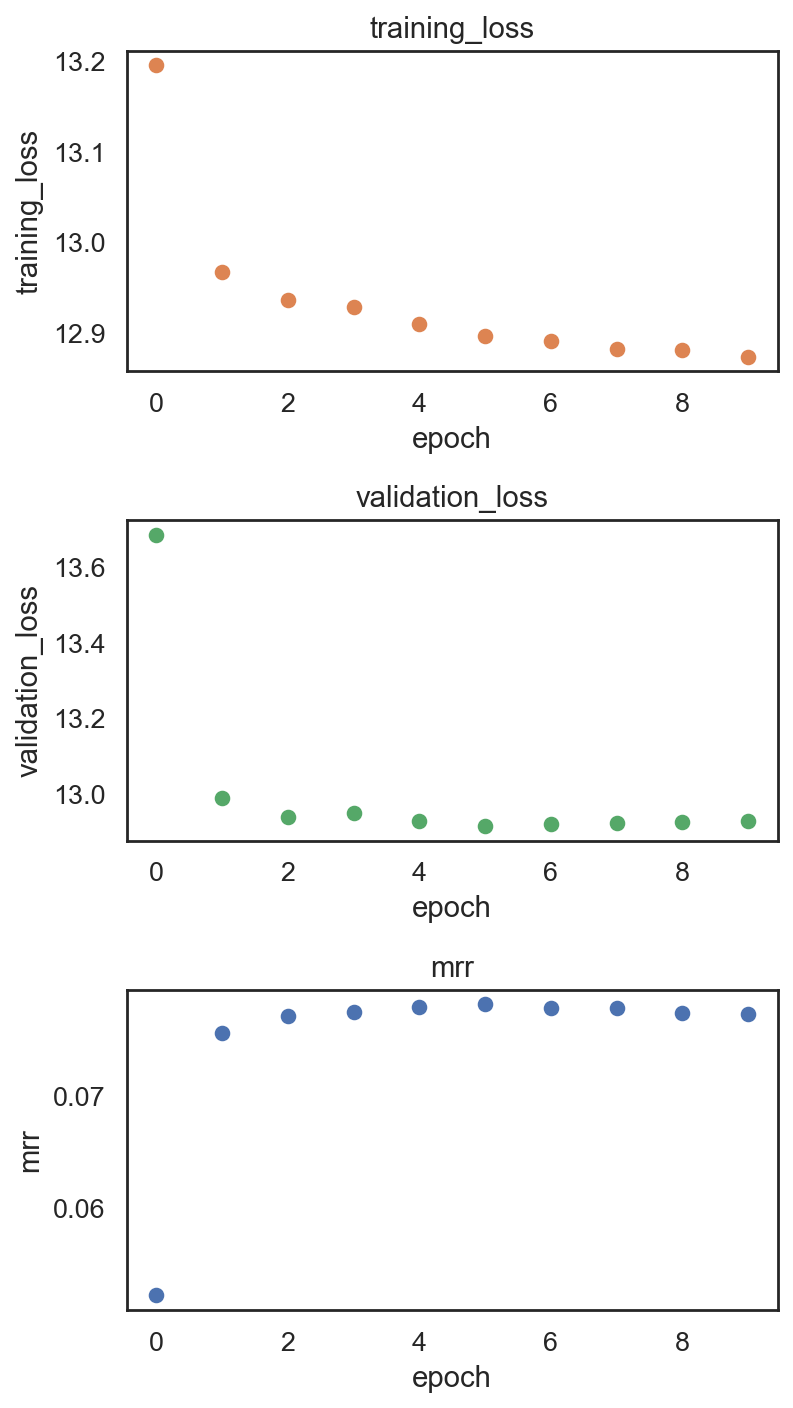

In [16]:
si.pl.pbg_metrics(fig_ncol=1)

In [17]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e',
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

dict_adata = si.read_embedding()

adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

AnnData object with n_obs × n_vars = 2700 × 50
    obs: 'celltype'

OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


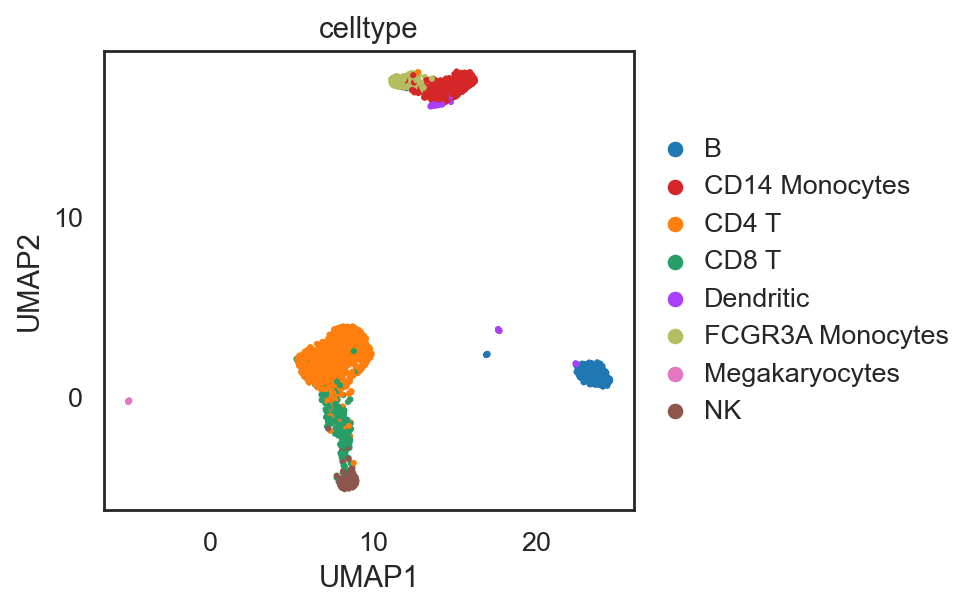

In [18]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(adata_C,color=['celltype'],
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

In [19]:
adata_cmp = si.tl.compare_entities(adata_ref=adata_C, adata_query=adata_G)

In [20]:
adata_cmp.var

,max,maxmin,std,gini,entropy
ZNF598,0.129842,0.280639,0.054731,0.029621,7.899536
PPP1R3D,0.178348,0.377757,0.091738,0.052585,7.896791
AC008443.1,0.131656,0.225992,0.039230,0.021341,7.900221
C9orf156,0.130726,0.287378,0.060123,0.033548,7.899238
SIAE,0.420383,0.565679,0.098600,0.040569,7.891687
...,...,...,...,...,...
PPP1R3E,0.301097,0.684499,0.167978,0.085700,7.888103
CTA-211A9.5,0.128488,0.338302,0.094609,0.051150,7.896728
PCYOX1L,0.074500,0.150210,0.031336,0.017734,7.900523
PGAP3,0.162981,0.363430,0.073365,0.039559,7.898387


In [21]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']


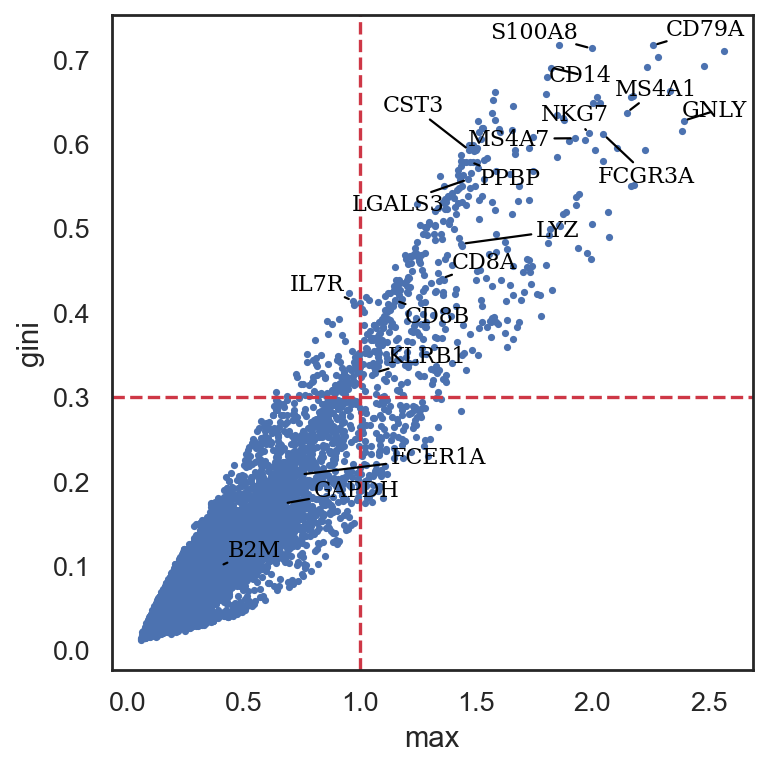

In [22]:
si.pl.entity_metrics(adata_cmp,
                     x='max',
                     y='gini',
                     show_contour=False,
                     texts=marker_genes + ['GAPDH', 'B2M'],
                     show_texts=True,
                     show_cutoff=True,
                     size=5,
                     text_expand=(1.3,1.5),
                     cutoff_x=1.,
                     cutoff_y=0.3,
                     save_fig=False)


### Using edge weights  (raw gene expression) - only variable genes

In [ ]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=True,
                layer=None,
                add_edge_weights=True,
                dirname='graph3')

In [ ]:
si.settings.pbg_params

In [ ]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 4 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model', use_edge_weights=True)

In [ ]:
si.pl.pbg_metrics(fig_ncol=1)

In [ ]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e',
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

dict_adata = si.read_embedding()

adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

In [ ]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(adata_C,color=['celltype'],
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

### Using edge weights (discretized gene expression) - all genes

In [ ]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                layer='simba',
                add_edge_weights=True,
                dirname='graph4')

In [ ]:
si.settings.pbg_params

In [ ]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 4 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model', use_edge_weights=True)

In [ ]:
si.pl.pbg_metrics(fig_ncol=1)

In [ ]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e',
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

dict_adata = si.read_embedding()

adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

In [ ]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(adata_C,color=['celltype'],
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

### Using edge weights  (discretized gene expression) - only variable genes

In [ ]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=True,
                layer='simba',
                add_edge_weights=True,
                dirname='graph5')

In [ ]:
si.settings.pbg_params

In [ ]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 4 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model', use_edge_weights=True)

In [ ]:
si.pl.pbg_metrics(fig_ncol=1)

In [ ]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e',
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

dict_adata = si.read_embedding()

adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

In [ ]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(adata_C,color=['celltype'],
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')